In [30]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
import mglearn

cancerデータセット…乳がんの腫瘍を計測したもの(特徴量の数は30)。良性(benign)、悪性(malignant)のラベル付けがされている

In [31]:
X_train, X_test, y_train, y_test= train_test_split(cancer.data,cancer.target,random_state=1)

In [32]:
#30次元の訓練データ426個とテストデータ143個
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

訓練データスケーリング(各特徴量の最小を0、最大を1に)

In [34]:
X_train_scaled = scaler.transform(X_train)
print("transformed shape:{}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(X_train_scaled.max(axis=0)))

transformed shape:(426, 30)
per-feature minimum before scaling:
 [  6.98100000e+00   9.71000000e+00   4.37900000e+01   1.43500000e+02
   5.26300000e-02   1.93800000e-02   0.00000000e+00   0.00000000e+00
   1.06000000e-01   5.02400000e-02   1.15300000e-01   3.60200000e-01
   7.57000000e-01   6.80200000e+00   1.71300000e-03   2.25200000e-03
   0.00000000e+00   0.00000000e+00   9.53900000e-03   8.94800000e-04
   7.93000000e+00   1.20200000e+01   5.04100000e+01   1.85200000e+02
   7.11700000e-02   2.72900000e-02   0.00000000e+00   0.00000000e+00
   1.56600000e-01   5.52100000e-02]
per-feature maximum before scaling:
 [  2.81100000e+01   3.92800000e+01   1.88500000e+02   2.50100000e+03
   1.63400000e-01   2.86700000e-01   4.26800000e-01   2.01200000e-01
   3.04000000e-01   9.57500000e-02   2.87300000e+00   4.88500000e+00
   2.19800000e+01   5.42200000e+02   3.11300000e-02   1.35400000e-01
   3.96000000e-01   5.27900000e-02   6.14600000e-02   2.98400000e-02
   3.60400000e+01   4.95400000e+01

訓練データ同様にテストデータもスケーリング
　訓練データを基準にしているため、最小最大は0～1の範囲に収まらない場合もある

In [35]:
X_test_scaled = scaler.transform(X_test)
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[ 0.9578778   0.81501522  0.95577362  0.89353128  0.81132075  1.21958701
  0.87956888  0.9333996   0.93232323  1.0371347   0.42669616  0.49765736
  0.44117231  0.28371044  0.48703131  0.73863671  0.76717172  0.62928585
  1.33685792  0.39057253  0.89612238  0.79317697  0.84859804  0.74488793
  0.9154725   1.13188961  1.07008547  0.92371134  1.20532319  1.63068851]


In [36]:
X_train

array([[  1.52200000e+01,   3.06200000e+01,   1.03400000e+02, ...,
          2.35600000e-01,   4.08900000e-01,   1.40900000e-01],
       [  1.49600000e+01,   1.91000000e+01,   9.70300000e+01, ...,
          1.48900000e-01,   2.96200000e-01,   8.47200000e-02],
       [  1.46800000e+01,   2.01300000e+01,   9.47400000e+01, ...,
          1.60900000e-01,   3.02900000e-01,   8.21600000e-02],
       ..., 
       [  1.72000000e+01,   2.45200000e+01,   1.14200000e+02, ...,
          1.89900000e-01,   3.31300000e-01,   1.33900000e-01],
       [  1.40300000e+01,   2.12500000e+01,   8.97900000e+01, ...,
          7.96300000e-02,   2.22600000e-01,   7.61700000e-02],
       [  1.30300000e+01,   1.84200000e+01,   8.26100000e+01, ...,
          5.01300000e-02,   1.98700000e-01,   6.16900000e-02]])

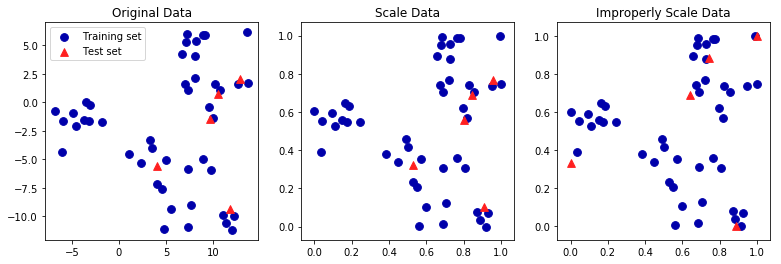

In [43]:
from sklearn.datasets import make_blobs
#合成データを作成(サンプル50、標準誤差2.0)
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
#10%をテストデータ
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker="^", c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc="upper left")
axes[0].set_title("Original Data")

#正しい方法(訓練データを基準に)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker="^", c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scale Data")

#間違った方法（テストと訓練を別々にスケール変換）
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker="^", c=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scale Data")

In [44]:
X_train

array([[  1.27251823e+01,   1.57438869e+00],
       [ -5.93198979e+00,  -1.64709857e+00],
       [  8.15123553e+00,   5.38122249e+00],
       [  1.22853293e+01,  -9.98451231e+00],
       [  9.84242817e+00,  -5.89522886e+00],
       [ -3.19866919e+00,  -1.65459041e+00],
       [  3.34864856e+00,  -3.27420491e+00],
       [ -4.52172578e+00,  -2.05305918e+00],
       [  7.33124533e+00,  -1.09317870e+01],
       [  7.24251911e+00,   5.97199258e+00],
       [ -3.71087149e+00,  -1.55730654e+00],
       [  1.04350784e+00,  -4.56583964e+00],
       [  1.11159570e+01,  -9.83721497e+00],
       [  7.37490891e+00,  -5.83058476e+00],
       [  1.37873172e+01,   1.73323541e+00],
       [  4.97413420e+00,  -5.07731900e+00],
       [  4.08951849e+00,  -7.14273949e+00],
       [  5.52778106e+00,  -9.35996182e+00],
       [  8.04518325e+00,   2.14179533e+00],
       [  1.01907416e+01,   1.60915127e+00],
       [  1.20691263e+01,  -1.11706840e+01],
       [ -4.84314674e+00,  -9.26876945e-01],
       [  

SVCを用いてスケーリングの効果を検証

In [48]:
from sklearn.svm import SVC
#生データをSVCに
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [49]:
#前処理としてスケール変換
scale = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#変換された訓練データで学習
svm.fit(X_train_scaled, y_train)
print("scaled test set accuracy:{:.2f}".format(svm.score(X_test_scaled, y_test)))

scaled test set accuracy:0.97


In [52]:
#個々の特徴量の平均が0で分散が1になるように変換
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("svm test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

svm test accuracy: 0.96


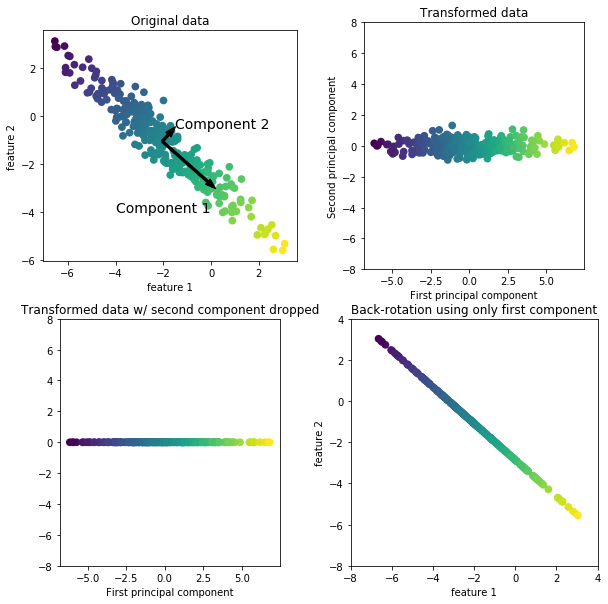

In [18]:
mglearn.plots.plot_pca_illustration()

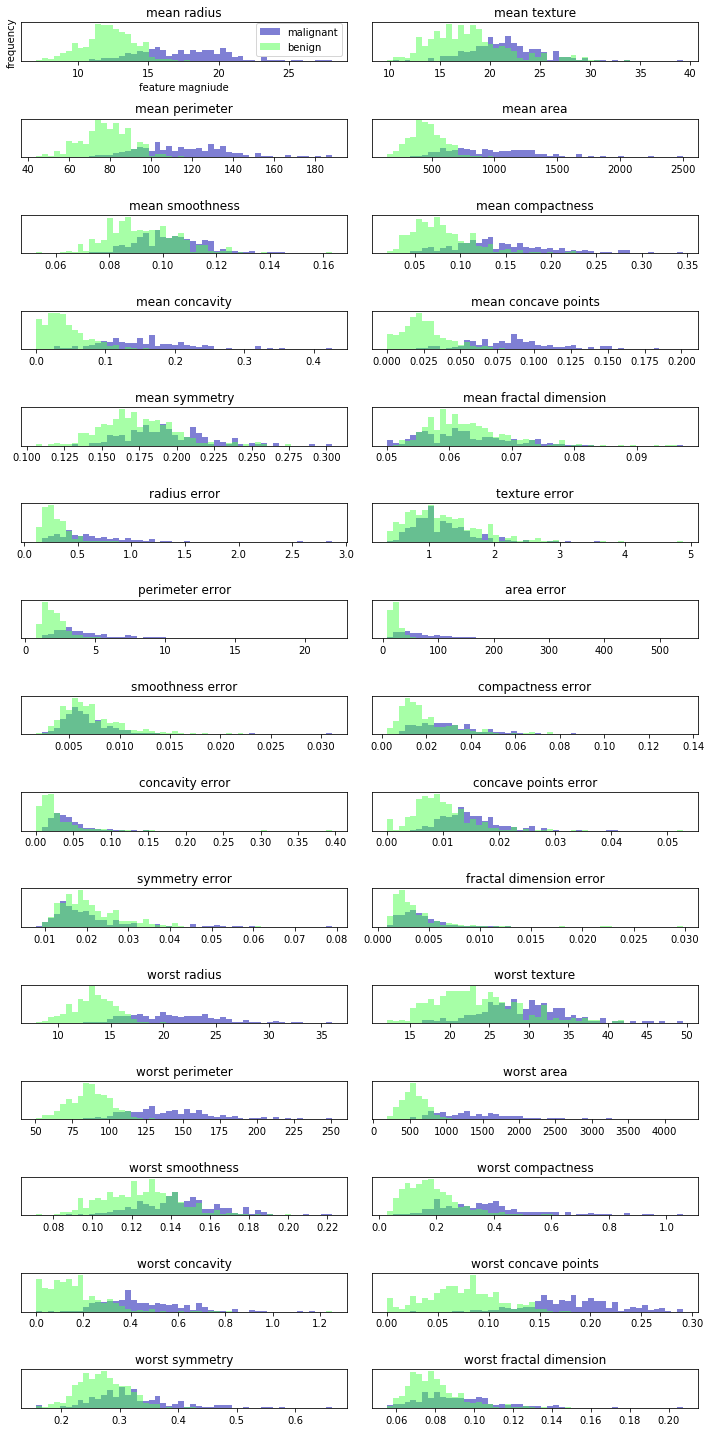

In [19]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0),alpha=0.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2),alpha=0.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("feature magniude")
ax[0].set_ylabel("frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

pca = PCA(n_components=2)
pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

original shape: (569, 30)
Reduced shape: (569, 2)


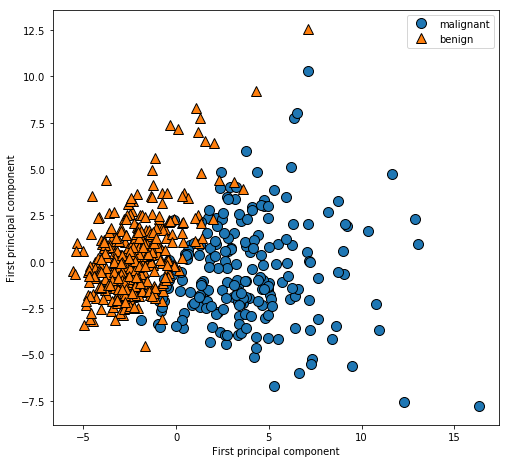

In [21]:
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("First principal component")

In [22]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [23]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


AttributeError: Unknown property rotations

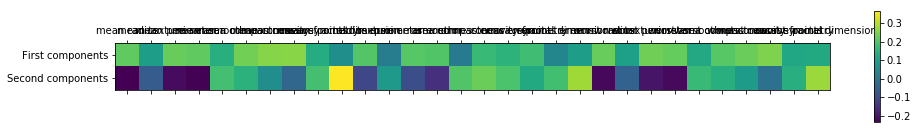

In [24]:
plt.matshow(pca.components_, cmap="viridis")
plt.yticks([0, 1],["First components", "Second components"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
          cancer.feature_names, rotations=60, ha="left")
plt.xlabel("feature")
plt.ylabel("Principal components")